<a href="https://colab.research.google.com/github/ChoLong02/Education_Python_Deeplearning/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%AA%A8%EB%8D%B8/multi_classification_using_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.모듈 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input, Flatten, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pylab as plt
plt.style.use('seaborn-white')

### 2.데이터셋 로드

In [ ]:
# MNIST 데이터셋 로드
# Train Data 중 30%를 Validation Data로 사용
tf.random.set_seed(111)
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size = 0.3,
                                                  random_state = 111)

### 3.데이터 확인

In [ ]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

print(f"Total Data: {x_train_full.shape}, Total Label: {y_train_full.shape}")
print(f"Train Data: {x_train.shape}, Train Label: {y_train.shape}")
print(f"Validation Data: {x_val.shape}, Validation Label: {y_val.shape}")
print(f"Test Data: {x_test.shape}, Test Label: {y_test.shape}")

Total Data: (60000, 28, 28), Total Label: (60000,)
Train Data: (42000, 28, 28), Train Label: (42000,)
Validation Data: (18000, 28, 28), Validation Label: (18000,)
Test Data: (10000, 28, 28), Test Label: (10000,)


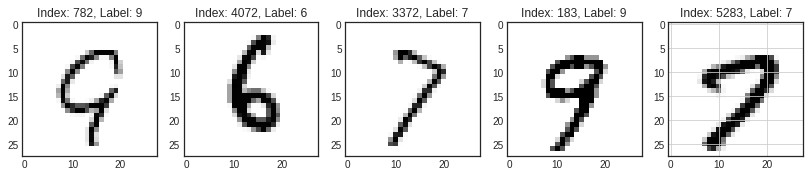

In [ ]:
num_sample = 5
random_idxs = np.random.randint(6000, size=num_sample)

plt.figure(figsize=(14, 8))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(img)
  plt.title(f"Index: {idx}, Label: {label}")

plt.grid()
plt.show()

### 4.데이터 전처리

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# Label → 원핫인코딩(One-hot encoding)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(f"Total Data: {x_train_full.shape}, Total Label: {y_train_full.shape}")
print(f"Train Data: {x_train.shape}, Train Label: {y_train.shape}")
print(f"Validation Data: {x_val.shape}, Validation Label: {y_val.shape}")
print(f"Test Data: {x_test.shape}, Test Label: {y_test.shape}")

Total Data: (60000, 28, 28), Total Label: (60000,)
Train Data: (42000, 28, 28), Train Label: (42000, 10)
Validation Data: (18000, 28, 28), Validation Label: (18000, 10)
Test Data: (10000, 28, 28), Test Label: (10000, 10)


### 5.모델 생성

In [ ]:
# Sequential Model 생성
model = Sequential([Input(shape=(28, 28), name='input'),
                    Flatten(input_shape=[28, 28], name='flatten'),
                    Dense(100, activation='relu', name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(10, activation='softmax', name='output')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Functional Model 생성
inputs = Input(shape=(28,28))
flatten = Flatten(input_shape=[28, 28])(inputs)
hidden1 = Dense(100, activation='relu')(flatten)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
outputs = Dense(10, activation='softmax')(hidden3)
model = Model(inputs, outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 64)                6464      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 87,374
Trainable params: 87,374
Non-trainable

### 6.모델 컴파일(Compile)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### 7.모델 학습(Fit)

In [ ]:
# 모델 시각화를 위해 history 변수에 담음
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 3s 8ms/step - loss: 1.6822 - accuracy: 0.5096 - val_loss: 0.9621 - val_accuracy: 0.7749
Epoch 2/50
329/329 [==============================] - 2s 7ms/step - loss: 0.6800 - accuracy: 0.8292 - val_loss: 0.5311 - val_accuracy: 0.8518
Epoch 3/50
329/329 [==============================] - 2s 7ms/step - loss: 0.4660 - accuracy: 0.8713 - val_loss: 0.4191 - val_accuracy: 0.8792
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.3920 - accuracy: 0.8899 - val_loss: 0.3733 - val_accuracy: 0.8910
Epoch 5/50
329/329 [==============================] - 2s 7ms/step - loss: 0.3499 - accuracy: 0.9004 - val_loss: 0.3319 - val_accuracy: 0.9045
Epoch 6/50
329/329 [==============================] - 2s 7ms/step - loss: 0.3205 - accuracy: 0.9090 - val_loss: 0.3188 - val_accuracy: 0.9064
Epoch 7/50
329/329 [==============================] - 2s 7ms/step - loss: 0.2977 - accuracy: 0.9150 - val_loss: 0.3171 - val_accuracy: 0.9061
Epoch 

### 8.학습 결과 시각화

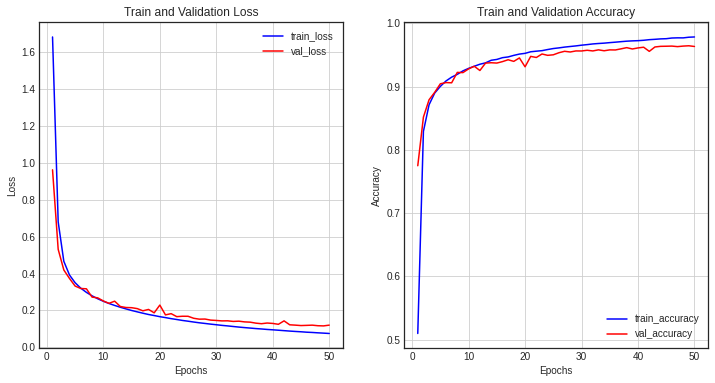

In [ ]:
history.history.keys()  # dict type

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

### 9.모델 평가(Evaluation)

In [ ]:
# Loss, Accuracy
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1218 - accuracy: 0.9643


[0.12175687402486801, 0.9642999768257141]

### 10.학습된 모델 활용 실제 값 예측

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[7.4642202e-08 5.8373395e-08 1.2875257e-06 4.2221440e-05 2.3137667e-09
 3.3682610e-07 2.6645948e-11 9.9995500e-01 1.0640672e-07 9.5523160e-07]


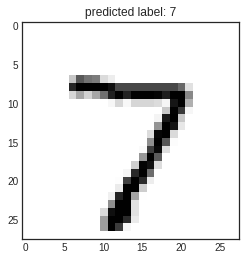

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])

arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title(f"predicted label: {arg_pred_y[0]}")
plt.show()

### 11. 모델 평가-2

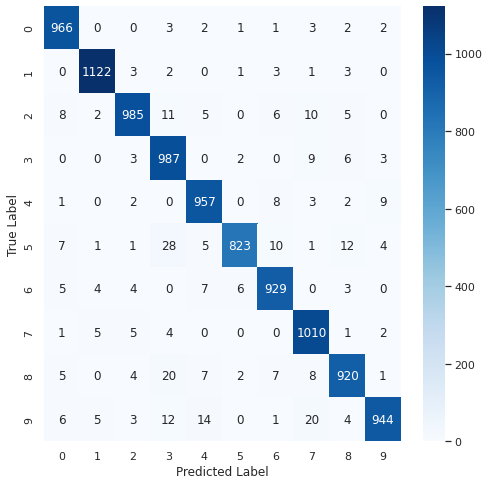

In [ ]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 12.모델 평가-3

In [ ]:
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.93      0.98      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.99      0.92      0.95       892
           6       0.96      0.97      0.97       958
           7       0.95      0.98      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
# Clinical ==> FeedForward Network
number_of_features = len(df_train.columns)
ff_input = Input(shape=(number_of_features,))
x = Dense(26, activation='relu')(ff_input)
x = Dense(13, activation='relu')(x)
x = Dense(7, activation='relu')(x)
x = Dense(4, activation='relu')(x)
ff_output = Dense(2, activation='relu')(x)

# CT ==> RESNET3D 34 Layer
ct_input, ct_output = Resnet3DBuilder.build_resnet_18((50, 128, 128, 1), 3) # 3d(dimention, width, height, channel), output
# PET ==> RESNET3D 34 Layer
pet_input, pet_output = Resnet3DBuilder.build_resnet_18((50, 128, 128, 1), 3) # 3d(dimention, width, height, channel), output

# 서로 다른 model 연결
concatenated = concatenate([ff_output, pet_output, ct_output]) # 2 + 32 + 32 = 66
c_layer = Dense(32, activation='relu')(concatenated)
c_layer = Dense(16, activation='relu')(c_layer)
c_layer = Dense(8, activation='relu')(c_layer)
ensemble_output = Dense(2, activation='softmax')(c_layer)

model = Model([ff_input, pet_input, ct_input], ensemble_output)